In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
np.random.seed(20180701)

## Load the Dataset

In [4]:
df = pd.read_csv('dataset_howell1.csv', sep=';')
df.shape

(544, 4)

In [5]:
group_ctl = df[df.male == 0].height
# randomly pick half of all
group_exp_1 = df[np.random.randint(0, 1+1, size=df.shape[0], dtype='bool')].height
# not a controlled experiment, but a natural experiment
# ref: https://en.wikipedia.org/wiki/Experiment#Natural_experiments
group_exp_2 = df[df.male == 1].height

In [6]:
group_ctl.head()

1    139.700
2    136.525
4    145.415
6    149.225
8    147.955
Name: height, dtype: float64

In [7]:
group_exp_1.head()

0    151.765
3    156.845
5    163.830
6    149.225
8    147.955
Name: height, dtype: float64

In [8]:
group_exp_2.head()

0    151.765
3    156.845
5    163.830
7    168.910
9    165.100
Name: height, dtype: float64

## Compare by Simple Means

In [9]:
group_exp_1.mean() > group_ctl.mean()

True

In [10]:
group_exp_2.mean() > group_ctl.mean()

True

## Compare by Distplots

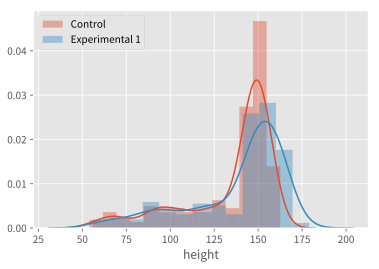

In [11]:
sns.distplot(group_ctl)
sns.distplot(group_exp_1)
plt.legend(['Control', 'Experimental 1'])

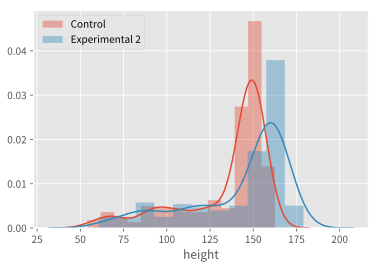

In [12]:
sns.distplot(group_ctl)
sns.distplot(group_exp_2)
plt.legend(['Control', 'Experimental 2'])

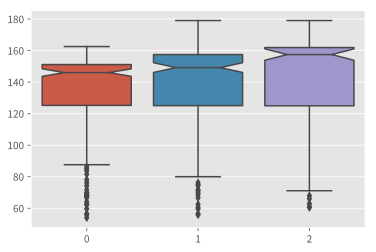

In [13]:
sns.boxplot(data=[group_ctl, group_exp_1, group_exp_2], notch=True)

## Compare by T-Tests

In [14]:
alpha = 0.05  # pre-defined significance levels

In [15]:
ttest_result = sp.stats.ttest_ind(group_ctl, group_exp_1)
print(ttest_result)
print(ttest_result.pvalue < alpha)

Ttest_indResult(statistic=-1.8207932319284201, pvalue=0.06917759383895489)
False


In [16]:
for x in [group_ctl, group_exp_1]:
    print(sp.stats.t.interval(1-alpha, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x)))

(131.61758225728605, 137.6429738402749)
(135.45752327269443, 142.04536594663634)


In [17]:
ttest_result = sp.stats.ttest_ind(group_ctl, group_exp_2)
print(ttest_result)
print(ttest_result.pvalue < alpha)

Ttest_indResult(statistic=-3.273256851064318, pvalue=0.0011309256622558707)
True


In [18]:
for x in [group_ctl, group_exp_2]:
    print(sp.stats.t.interval(1-alpha, len(x)-1, loc=np.mean(x), scale=sp.stats.sem(x)))

(131.61758225728605, 137.6429738402749)
(138.77448647827293, 145.86758822989827)


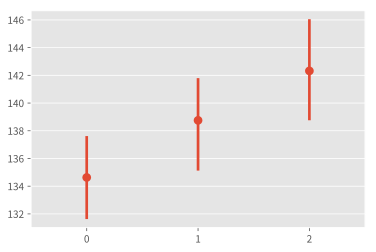

In [19]:
sns.pointplot(data=[group_ctl, group_exp_1, group_exp_2], join=False)